Challenge
Retrieves data from the following REST API. https://data.nantesmetropole.fr/api/records/1.0/search/?dataset=244400404_stations-velos-libre-service-nantes-metropole-disponibilites&q=&facet=banking&facet=bonus&facet=status&facet=contract_name

API documentation is available here. https://data.nantesmetropole.fr/explore/dataset/244400404_stations-velos-libre-service-nantes-metropole-disponibilites/api/

Displays a DataFrame with the address of each station, and the associated fill rate (i.e. the number of available bikes available_bikes / the number of total slots bike_stands).

Expected result (the fill rates will be different, as the data is generated in real time):

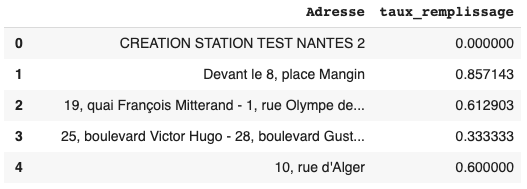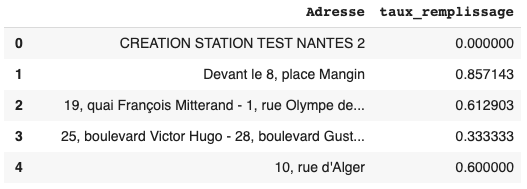

In [16]:
import requests
import pandas as pd

In [23]:
link = 'https://data.nantesmetropole.fr/api/records/1.0/search/?dataset=244400404_stations-velos-libre-service-nantes-metropole-disponibilites&q=&facet=banking&facet=bonus&facet=status&facet=contract_name'
r = requests.get(link)
pd.json_normalize(r.json())

,nhits,records,facet_groups,parameters.dataset,parameters.timezone,parameters.rows,parameters.start,parameters.format,parameters.facet
0,127,[{'datasetid': '244400404_stations-velos-libre...,"[{'facets': [{'count': 127, 'path': 'False', '...",[244400404_stations-velos-libre-service-nantes...,UTC,10,0,json,"[banking, bonus, status, contract_name]"


In [5]:
link = 'https://data.nantesmetropole.fr/api/records/1.0/search/?dataset=244400404_stations-velos-libre-service-nantes-metropole-disponibilites&q=&facet=banking&facet=bonus&facet=status&facet=contract_name'
r = requests.get(link)
df=pd.json_normalize(r.json(),record_path= "records")

In [25]:
df['fill_rate'] = df['fields.available_bikes']/df['fields.bike_stands']

In [24]:
df[['fields.address','fill_rate']]

,fields.address,fill_rate
0,"2, rue de Gigant - Place de l'Edit de Nantes",0.000000
1,NaN,0.000000
2,Rue de la Loire - place Gaston Defferre,0.454545
3,Allée de la Bourse - Boulevard des Nations-Unies,0.227273
4,"5, boulevard de Berlin",0.000000
5,"4, place Sainte Elisabeth",0.714286
6,"102, rue Paul Bellamy",0.785714
7,"15, quai de Malakoff",0.466667
8,"20, quai des Antilles",0.250000
9,"1, allée de l'Île Gloriette",0.666667
